# UAS PMPM GoogleNet
- Yosua Vito
- 220711893
- Keras
- Cabai (Rawit, Keriting, Hijau)
- MobileNet




In [20]:
import tensorflow as tf
import cv2
import numpy as np
from matplotlib import pyplot as plt 

data_dir = r"C:\Pembelajaran Mesin dan Pembelajaran Mendalam\UAS\train_data" 

data = tf.keras.utils.image_dataset_from_directory(data_dir, seed = 123, image_size=(180, 180), batch_size=16)
print(data.class_names)

class_names = data.class_names

img_size = 180
batch = 32
validation_split = 0.1
dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    seed=123,
    image_size=(img_size, img_size),
    batch_size=batch,
)
total_count = len(dataset)
val_count = int(total_count * validation_split)
train_count = total_count - val_count

print("Total Images:", total_count)
print("Train Images:", train_count)
print("Validation Images:", val_count)

train_ds = dataset.take(train_count)
val_ds = dataset.skip(train_count)


Found 300 files belonging to 3 classes.


['Hijau', 'Keriting', 'Rawit']
Found 300 files belonging to 3 classes.
Total Images: 10
Train Images: 9
Validation Images: 1


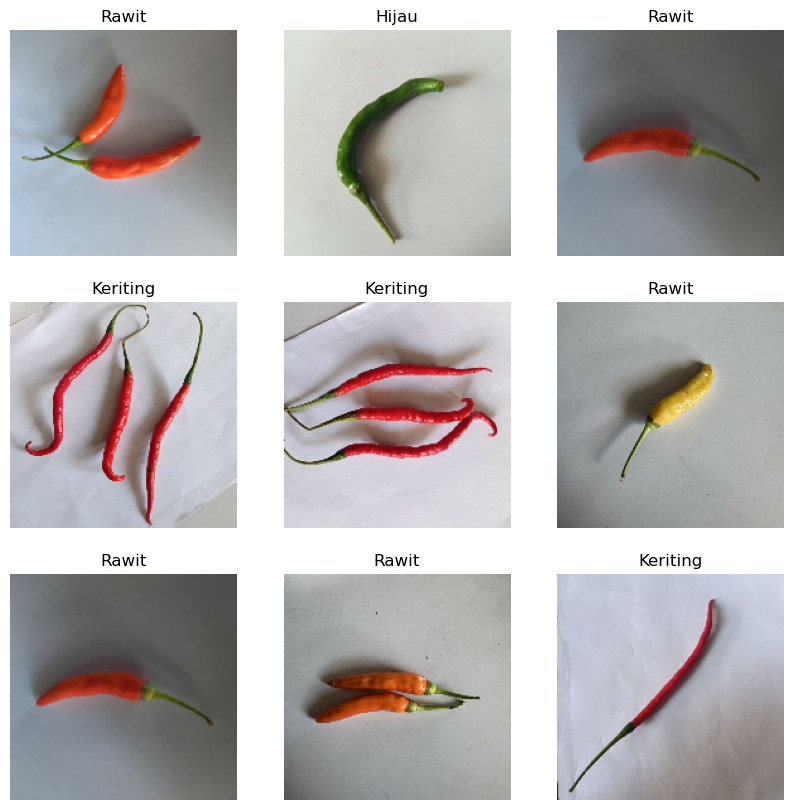

In [21]:
import matplotlib.pyplot as plt

i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(class_names[labels[i]])
        plt.axis('off')

In [22]:
for images, labels in train_ds.take(1):
    images_array = np.array(images)
    print(images_array.shape)

(32, 180, 180, 3)


c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


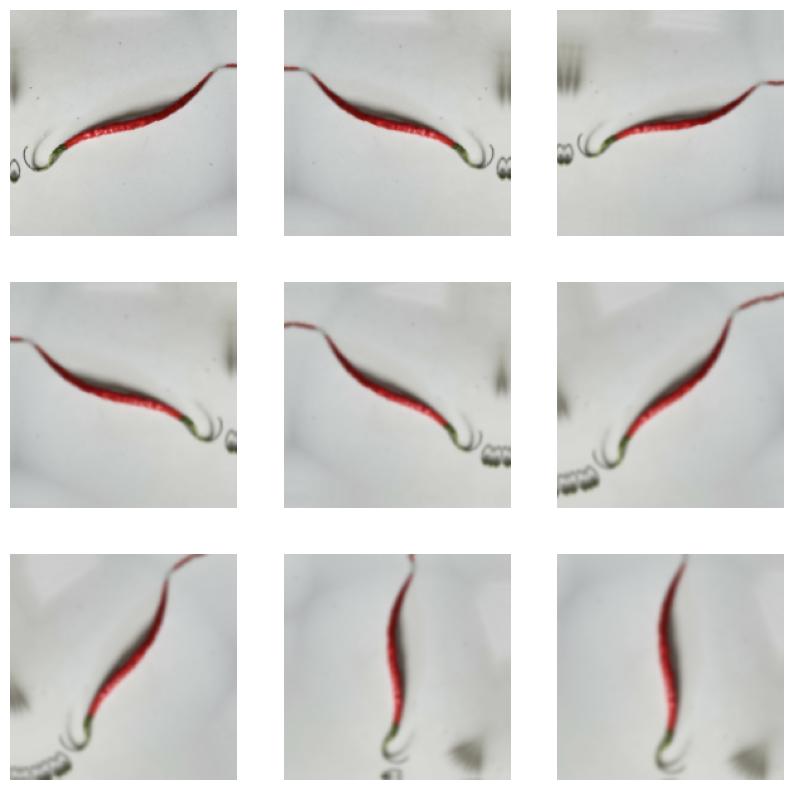

In [23]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, load_model

Tuner = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size = Tuner)

data_augmentation = Sequential([
    layers.RandomFlip("horizontal", input_shape = (img_size, img_size, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

i = 0
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(69):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [24]:
import tensorflow as tf
import keras

import keras._tf_keras.keras.backend as K
from keras._tf_keras.keras.models import Model
from keras._tf_keras.keras.layers import Input, Dense, Conv2D
from keras._tf_keras.keras.layers import Flatten, MaxPool2D, AvgPool2D
from keras._tf_keras.keras.layers import Concatenate, Dropout

from keras._tf_keras.keras.models import load_model

#membuat model from scratch 
def googlenet(input_shape, n_classes):
    
    def inception_block(x, f):
        t1 = Conv2D(f[0], 1, activation='relu')(x)

        t2 = Conv2D(f[1], 1, activation='relu')(x)
        t2 = Conv2D(f[2], 3, padding='same', activation='relu')(t2)
 
        t3 = Conv2D(f[3], 1, activation='relu')(x)
        t3 = Conv2D(f[4], 5, padding='same', activation='relu')(t3)

        t4 = MaxPool2D(3, 1, padding='same')(x)
        t4 = Conv2D(f[5], 1, activation='relu')(t4)

        output = Concatenate()([t1, t2, t3, t4])
        return output
  
  
    input = Input(input_shape)
    
    x = Conv2D(64, 7, strides=2, padding='same', activation='relu')(input)
    x = MaxPool2D(3, strides=2, padding='same')(x)
    
    x = Conv2D(64, 1, activation='relu')(x)
    x = Conv2D(192, 3, padding='same', activation='relu')(x)
    x = MaxPool2D(3, strides=2)(x)
    
    x = inception_block(x, [64, 96, 128, 16, 32, 32])
    x = inception_block(x, [128, 128, 192, 32, 96, 64])
    x = MaxPool2D(3, strides=2, padding='same')(x)
    
    x = inception_block(x, [192, 96, 208, 16, 48, 64])
    x = inception_block(x, [160, 112, 224, 24, 64, 64])
    x = inception_block(x, [128, 128, 256, 24, 64, 64])
    x = inception_block(x, [112, 144, 288, 32, 64, 64])
    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = MaxPool2D(3, strides=2, padding='same')(x)

    x = inception_block(x, [256, 160, 320, 32, 128, 128])
    x = inception_block(x, [384, 192, 384, 48, 128, 128])
    
    x = AvgPool2D(3, strides=1)(x)
    x = Dropout(0.4)(x)
  
    x = Flatten()(x)
    output = Dense(n_classes, activation='softmax')(x)
    
    model = Model(input, output)
    return model

input_shape = 180, 180, 3   
n_classes = 3             

K.clear_session()

model = googlenet(input_shape, n_classes)
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer         │ (None, 180, 180,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d (Conv2D)     │ (None, 90, 90,    │      9,472 │ input_layer[0][0] │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d       │ (None, 45, 45,    │          0 │ conv2d[0][0]      │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_1 (Conv2D)   │ (None, 45, 45,    │      4,160 │ max_pooling2d[0]… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_2 (Conv2D)   │ (None, 45, 45,    │    110,784 │ conv2d_1[0][0]    │
│                     │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_1     │ (None, 22, 22,    │          0 │ conv2d_2[0][0]    │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_4 (Conv2D)   │ (None, 22, 22,    │     18,528 │ max_pooling2d_1[… │
│                     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_6 (Conv2D)   │ (None, 22, 22,    │      3,088 │ max_pooling2d_1[… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_2     │ (None, 22, 22,    │          0 │ max_pooling2d_1[… │
│ (MaxPooling2D)      │ 192)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_3 (Conv2D)   │ (None, 22, 22,    │     12,352 │ max_pooling2d_1[… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_5 (Conv2D)   │ (None, 22, 22,    │    110,720 │ conv2d_4[0][0]    │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_7 (Conv2D)   │ (None, 22, 22,    │     12,832 │ conv2d_6[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_8 (Conv2D)   │ (None, 22, 22,    │      6,176 │ max_pooling2d_2[… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 22, 22,    │          0 │ conv2d_3[0][0],   │
│ (Concatenate)       │ 256)              │            │ conv2d_5[0][0],   │
│                     │                   │            │ conv2d_7[0][0],   │
│                     │                   │            │ conv2d_8[0][0]    │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_10 (Conv2D)  │ (None, 22, 22,    │     32,896 │ concatenate[0][0] │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_12 (Conv2D)  │ (None, 22, 22,    │      8,224 │ concatenate[0][0] │
│                     │ 32)               │            │                 

 Total params: 6,022,707 (22.97 MB)

 Trainable params: 6,022,707 (22.97 MB)

 Non-trainable params: 0 (0.00 B)

In [25]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

early_stopping = EarlyStopping(monitor='val_accuracy', 
                               patience=5, 
                               mode='max')

history= model.fit(train_ds, 
                   epochs=30, 
                   validation_data=val_ds, 
                   callbacks=[early_stopping])

Epoch 1/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 17s 448ms/step - accuracy: 0.3010 - loss: 7.1376 - val_accuracy: 0.1667 - val_loss: 1.2006
Epoch 2/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 311ms/step - accuracy: 0.3429 - loss: 1.1122 - val_accuracy: 0.4167 - val_loss: 1.0901
Epoch 3/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.3261 - loss: 1.0981 - val_accuracy: 0.4167 - val_loss: 1.1060
Epoch 4/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 318ms/step - accuracy: 0.3833 - loss: 1.0955 - val_accuracy: 0.5000 - val_loss: 1.0817
Epoch 5/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 324ms/step - accuracy: 0.4019 - loss: 1.0733 - val_accuracy: 0.6667 - val_loss: 1.0625
Epoch 6/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 343ms/step - accuracy: 0.3582 - loss: 1.0941 - val_accuracy: 0.4167 - val_loss: 1.0536
Epoch 7/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 341ms/step - accuracy: 0.3876 - loss: 1.0892 - val_accuracy: 0.4167 - val_loss: 1.0485
Epoch 8/30
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 345ms/step - accuracy: 0.3950 - loss: 1.0828 - val_accuracy: 0.5833 - val_loss

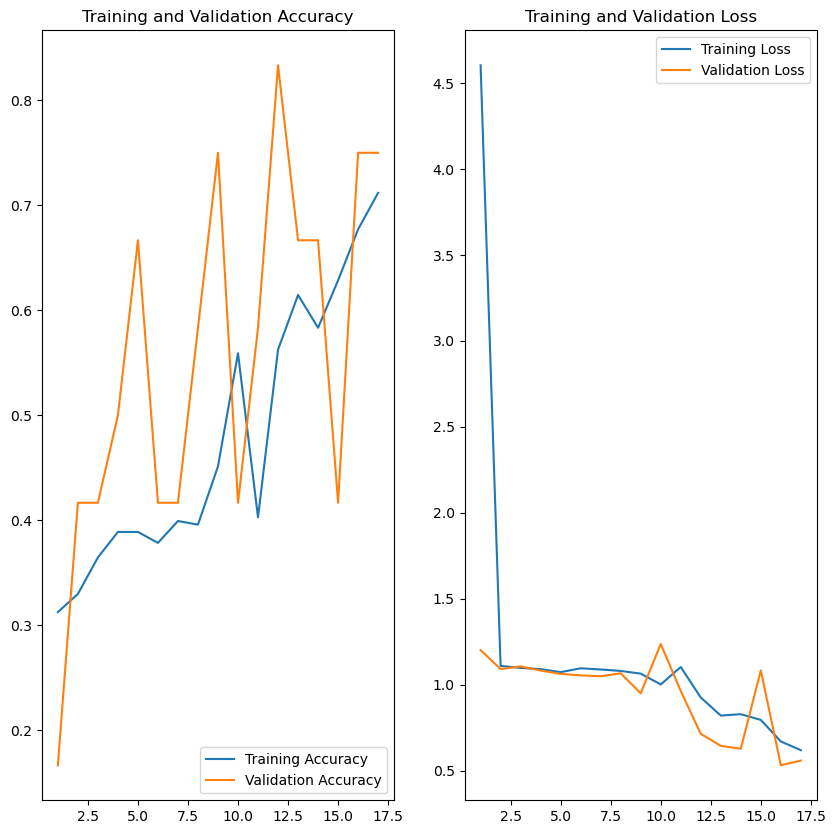

In [26]:
#buat plot dengan menggunakan history supaya jumlahnya sesuai epoch yang dilakukan
ephocs_range = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(ephocs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(ephocs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(ephocs_range, history.history['loss'], label='Training Loss')
plt.plot(ephocs_range, history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [27]:
model.save('gugelnet.h5')

In [28]:
import os
import tensorflow as tf
import numpy as np
from tensorflow.keras.models import load_model
from PIL import Image

# Load model Anda
model = load_model(r'./gugelnet.h5')  # Path ke model Anda
class_names = ['Cabe Hijau', 'Cabe Keriting', 'Cabe Rawit']

def classify_images(image_path):
    # Load dan preprocess gambar
    input_image = tf.keras.utils.load_img(image_path, target_size=(180, 180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array, 0)  # Tambah dimensi batch

    # Prediksi
    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    class_idx = np.argmax(result)
    confidence = np.max(result) * 100

    return class_names[class_idx], confidence

def classify_all_images(folder_path, save_results=True):
    results = []  # Untuk menyimpan hasil prediksi
    for category in os.listdir(folder_path):  # Iterasi kategori (Hijau, Keriting, Rawit)
        category_path = os.path.join(folder_path, category)
        if os.path.isdir(category_path):  # Pastikan folder
            for filename in os.listdir(category_path):  # Iterasi file gambar
                if filename.endswith(('.jpg', '.jpeg', '.png')):  # Filter hanya gambar
                    image_path = os.path.join(category_path, filename)
                    predicted_class, confidence = classify_images(image_path)
                    
                    # Simpan hasil
                    results.append({
                        'filename': filename,
                        'category': category,
                        'predicted_class': predicted_class,
                        'confidence': confidence
                    })

                    # Print hasil untuk setiap gambar
                    print(f"File: {filename} | Asli: {category} | Prediksi: {predicted_class} | Confidence: {confidence:.2f}%")

    if save_results:
        # Simpan hasil prediksi ke file CSV
        import csv
        with open('classification_results.csv', 'w', newline='') as csvfile:
            fieldnames = ['filename', 'category', 'predicted_class', 'confidence']
            writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
            writer.writeheader()
            writer.writerows(results)
        print("\nHasil klasifikasi disimpan di 'classification_results.csv'.")

    return results

# Jalankan fungsi untuk folder test_data
test_data_folder = r'./test_data'
results = classify_all_images(test_data_folder)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 479ms/step
File: Hijau (103).jpg | Asli: Hijau | Prediksi: Cabe Hijau | Confidence: 56.15%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
File: Hijau (106).jpg | Asli: Hijau | Prediksi: Cabe Hijau | Confidence: 56.47%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
File: Hijau (107).jpg | Asli: Hijau | Prediksi: Cabe Hijau | Confidence: 54.87%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
File: Hijau (108).jpg | Asli: Hijau | Prediksi: Cabe Hijau | Confidence: 57.57%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
File: Hijau (109).jpg | Asli: Hijau | Prediksi: Cabe Hijau | Confidence: 57.60%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
File: Hijau (110).jpg | Asli: Hijau | Prediksi: Cabe Keriting | Confidence: 43.59%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
File: Hijau (111).jpg | Asli: Hijau | Prediksi: Cabe Hijau | Confidence: 57.60%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
File: Hijau (112).jpg | Asli: Hijau | Prediksi: Cabe Hijau | Confidence: 50.44%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
File: Hijau (1

Found 59 files belonging to 3 classes.


2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 907ms/step


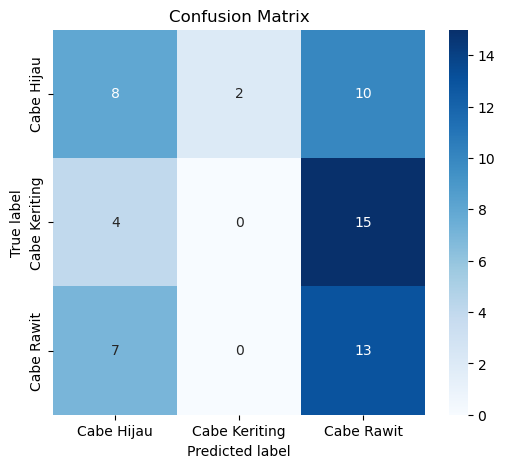

Confusion Matrix:
 [[ 8  2 10]
 [ 4  0 15]
 [ 7  0 13]]
Akurasi: 0.3559322033898305
Presisi: [0.42105263 0.         0.34210526]
Recall: [0.4  0.   0.65]
F1 Score: [0.41025641        nan 0.44827586]


In [29]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import seaborn as sns
import matplotlib.pyplot as plt

test_data = tf.keras.preprocessing.image_dataset_from_directory(
    r'test_data',
    labels='inferred',
    label_mode='categorical',
    batch_size=32,
    image_size=(180, 180)
)

y_pred = model.predict(test_data)
y_pred_class = tf.argmax(y_pred, axis=1)

true_labels = []
for _, labels in test_data:
    true_labels.extend(tf.argmax(labels, axis=1).numpy())
true_labels = tf.convert_to_tensor(true_labels)

conf_mat = tf.math.confusion_matrix(true_labels, y_pred_class, num_classes=3)

accuracy = tf.reduce_sum(tf.linalg.diag_part(conf_mat)) / tf.reduce_sum(conf_mat)

precision = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=0)
recall = tf.linalg.diag_part(conf_mat) / tf.reduce_sum(conf_mat, axis=1)

f1_score = 2 * (precision * recall) / (precision + recall)

plt.figure(figsize=(6, 5))
sns.heatmap(conf_mat.numpy(), annot=True, fmt='d', cmap='Blues', 
            xticklabels=["Cabe Hijau", "Cabe Keriting", "Cabe Rawit"], yticklabels=["Cabe Hijau", "Cabe Keriting", "Cabe Rawit"])
plt.title('Confusion Matrix')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()

print("Confusion Matrix:\n", conf_mat.numpy())
print("Akurasi:", accuracy.numpy())
print("Presisi:", precision.numpy())
print("Recall:", recall.numpy())
print("F1 Score:", f1_score.numpy())
